# Rotations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

# Theory

### Similarity of structure in tangent spaces
1. Local tangent space and lie algebra are similar. They differ by a transform. 
2. Local tangent spaces and lie algebra has the same velocity if defined locally


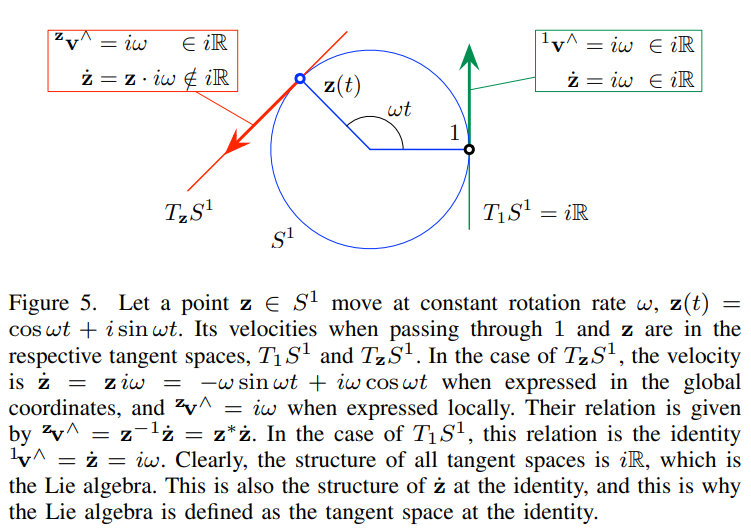

### Adjoint and right jacobian are different. 
Three different concepts:
1. exp(theta+del_theta) - Jacobians relate del_theta here to multiplicative factor as in exp(theta)exp(del_phi)
2. exp(theta)exp(del_theta) - Local variations in tangent space at exp(theta) are defined like this on the right
3. exp(del_theta)exp(theta) - Global variations in tangent space at exp(0) or identity are defined like this on the left

Adjoint relates 2 and 3 however jacobian is at 1. Jacobian also is related more to f(R) rather than R in microlie theory paper.
Right jacobian converts change in tangent space in identity to changes in local tangent space. Hence a small addition in tangent space at identity, how does it look like as a local variation at exp(theta) is given by right jacobian. How it differs from exp(del_theta)exp(theta) (global variations) is that 
1. exp(theta+del_theta) does not equal exp(del_theta)exp(theta). They are related by left jacobian even if del_theta in both case is expressed in tangent space at identity 
2. you are still using the global variations in this case and not converting it into local variations

Adjoint:
perturbation at tangent space at identity = Adj * perturbation at tangent space at x
$$Ad_{Exp(τ)} = J_{l}(τ ) J{}^{−1}_{r}(τ )$$
Check https://arxiv.org/pdf/1812.01537
Questions:
Is exp(theta+del_theta) == exp(theta)exp(del_theta) or exp(del_theta)exp(theta). If yes where is del_theta expressed in. On global case exp(theta) is calculated from the point del_theta as you can see in the figure 7. What are its implications

The below images are quite important.

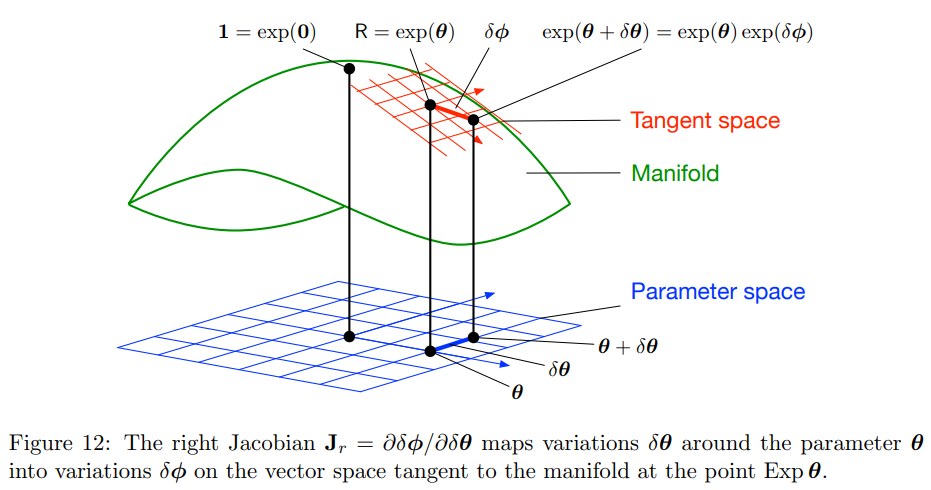

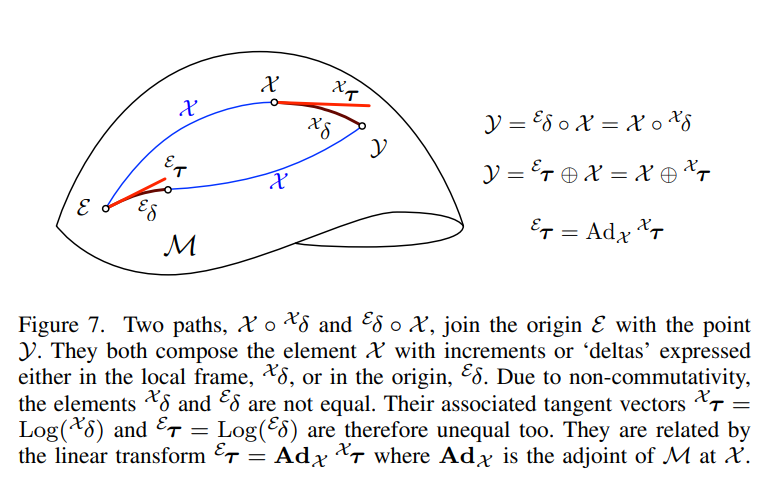

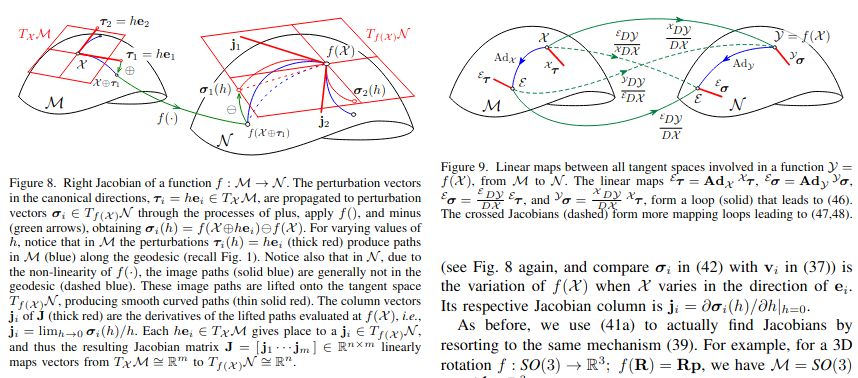

# 1. JPL Quaternion Convention Functions

## 1.1 Quaternion Definitions

The quaternion in JPL convention is defined as:

$$\bar{q} = q_4 + q_1\mathbf{i} + q_2\mathbf{j} + q_3\mathbf{k}$$

where $\mathbf{i}, \mathbf{j}, \mathbf{k}$ are hyperimaginary numbers satisfying:

$$\mathbf{i}^2 = -1, \quad \mathbf{j}^2 = -1, \quad \mathbf{k}^2 = -1$$

$$-\mathbf{i}\mathbf{j} = \mathbf{j}\mathbf{i} = \mathbf{k}, \quad -\mathbf{j}\mathbf{k} = \mathbf{k}\mathbf{j} = \mathbf{i}, \quad -\mathbf{k}\mathbf{i} = \mathbf{i}\mathbf{k} = \mathbf{j}$$

The quaternion is represented as a 4D column vector:

$$\bar{q} = \begin{bmatrix} \mathbf{q} \\ q_4 \end{bmatrix} = \begin{bmatrix} q_1 & q_2 & q_3 & q_4 \end{bmatrix}^T$$

where $q_4$ is the **scalar** part and $\mathbf{q} = q_1\mathbf{i} + q_2\mathbf{j} + q_3\mathbf{k}$ is the **vector** part.

## 1.2 Quaternion from Axis-Angle

For a rotation of angle $\theta$ about axis $\hat{\mathbf{k}}$:

$$\mathbf{q} = \begin{bmatrix} k_x \sin(\theta/2) \\ k_y \sin(\theta/2) \\ k_z \sin(\theta/2) \end{bmatrix} = \hat{\mathbf{k}} \sin(\theta/2), \quad q_4 = \cos(\theta/2)$$

The quaternion of rotation is a **unit quaternion** satisfying:

$$|\bar{q}| = \sqrt{\bar{q}^T\bar{q}} = \sqrt{|\mathbf{q}|^2 + q_4^2} = 1$$

In [4]:
def quat_from_axis_angle(axis: np.ndarray, angle: float) -> np.ndarray:
    """
    Create a JPL quaternion from axis-angle representation.
    
    Parameters
    ----------
    axis : np.ndarray, shape (3,)
        Rotation axis (will be normalized)
    angle : float
        Rotation angle in radians
    
    Returns
    -------
    q : np.ndarray, shape (4,)
        JPL quaternion [q1, q2, q3, q4]^T where q4 is the scalar part
    """
    axis = axis / np.linalg.norm(axis)  # Normalize axis
    half_angle = angle / 2.0
    
    q = np.zeros(4)
    q[0:3] = axis * np.sin(half_angle)  # Vector part: [q1, q2, q3]
    q[3] = np.cos(half_angle)            # Scalar part: q4
    
    return q

## 1.3 Skew-Symmetric Matrix Operator

The skew-symmetric matrix operator $[\mathbf{q} \times]$ for the vector part is:

$$[\mathbf{q} \times] = \begin{bmatrix} 0 & -q_3 & q_2 \\ q_3 & 0 & -q_1 \\ -q_2 & q_1 & 0 \end{bmatrix}$$

This allows us to write the cross product as:

$$\mathbf{q} \times \mathbf{p} = [\mathbf{q} \times] \mathbf{p}$$

In [5]:
def skew_symmetric(v: np.ndarray) -> np.ndarray:
    """
    Create skew-symmetric matrix from 3D vector.
    
    Parameters
    ----------
    v : np.ndarray, shape (3,)
        3D vector
    
    Returns
    -------
    skew : np.ndarray, shape (3, 3)
        Skew-symmetric matrix [v×]
    """
    return np.array([
        [0, -v[2], v[1]],
        [v[2], 0, -v[0]],
        [-v[1], v[0], 0]
    ])

## 1.4 Quaternion Multiplication Matrices

The quaternion multiplication $\bar{q} \otimes \bar{p}$ can be written in matrix form using two operators:

### Left Multiplication Matrix $\mathcal{L}(\bar{q})$:

$$\bar{q} \otimes \bar{p} = \mathcal{L}(\bar{q})\bar{p}$$

$$\mathcal{L}(\bar{q}) = \begin{bmatrix} q_4 & q_3 & -q_2 & q_1 \\ -q_3 & q_4 & q_1 & q_2 \\ q_2 & -q_1 & q_4 & q_3 \\ -q_1 & -q_2 & -q_3 & q_4 \end{bmatrix} = \begin{bmatrix} q_4\mathbf{I}_{3\times3} - [\mathbf{q}\times] & \mathbf{q} \\ -\mathbf{q}^T & q_4 \end{bmatrix}$$

### Right Multiplication Matrix $\mathcal{R}(\bar{p})$:

$$\bar{q} \otimes \bar{p} = \mathcal{R}(\bar{p})\bar{q}$$

$$\mathcal{R}(\bar{p}) = \begin{bmatrix} p_4 & -p_3 & p_2 & p_1 \\ p_3 & p_4 & -p_1 & p_2 \\ -p_2 & p_1 & p_4 & p_3 \\ -p_1 & -p_2 & -p_3 & p_4 \end{bmatrix} = \begin{bmatrix} p_4\mathbf{I}_{3\times3} + [\mathbf{p}\times] & \mathbf{p} \\ -\mathbf{p}^T & p_4 \end{bmatrix}$$

In [6]:
def quat_multiply_left_matrix(q: np.ndarray) -> np.ndarray:
    """
    Compute left multiplication matrix L(q) for JPL quaternion multiplication.
    
    q ⊗ p = L(q)p
    
    Parameters
    ----------
    q : np.ndarray, shape (4,)
        JPL quaternion [q1, q2, q3, q4]^T
    
    Returns
    -------
    L : np.ndarray, shape (4, 4)
        Left multiplication matrix
    """
    q1, q2, q3, q4 = q
    
    return np.array([
        [q4, q3, -q2, q1],
        [-q3, q4, q1, q2],
        [q2, -q1, q4, q3],
        [-q1, -q2, -q3, q4]
    ])

In [7]:
def quat_multiply_right_matrix(p: np.ndarray) -> np.ndarray:
    """
    Compute right multiplication matrix R(p) for JPL quaternion multiplication.
    
    q ⊗ p = R(p)q
    
    Parameters
    ----------
    p : np.ndarray, shape (4,)
        JPL quaternion [p1, p2, p3, p4]^T
    
    Returns
    -------
    R : np.ndarray, shape (4, 4)
        Right multiplication matrix
    """
    p1, p2, p3, p4 = p
    
    return np.array([
        [p4, -p3, p2, p1],
        [p3, p4, -p1, p2],
        [-p2, p1, p4, p3],
        [-p1, -p2, -p3, p4]
    ])

## 1.5 Quaternion Multiplication

Direct quaternion multiplication following JPL convention:

$$\bar{q} \otimes \bar{p} = (q_4 + q_1\mathbf{i} + q_2\mathbf{j} + q_3\mathbf{k})(p_4 + p_1\mathbf{i} + p_2\mathbf{j} + p_3\mathbf{k})$$

Results in:

$$\bar{q} \otimes \bar{p} = \begin{bmatrix} q_4p_1 + q_3p_2 - q_2p_3 + q_1p_4 \\ -q_3p_1 + q_4p_2 + q_1p_3 + q_2p_4 \\ q_2p_1 - q_1p_2 + q_4p_3 + q_3p_4 \\ -q_1p_1 - q_2p_2 - q_3p_3 + q_4p_4 \end{bmatrix}$$

Alternative compact forms:

$$\bar{q} \otimes \bar{p} = \begin{bmatrix} q_4\mathbf{p} + p_4\mathbf{q} - \mathbf{q} \times \mathbf{p} \\ q_4p_4 - \mathbf{q}^T\mathbf{p} \end{bmatrix} = \begin{bmatrix} p_4\mathbf{q} + q_4\mathbf{p} + [\mathbf{p}\times]\mathbf{q} \\ p_4q_4 - \mathbf{p}^T\mathbf{q} \end{bmatrix}$$

In [8]:
def quat_multiply(q: np.ndarray, p: np.ndarray) -> np.ndarray:
    """
    Multiply two JPL quaternions: q ⊗ p
    
    Parameters
    ----------
    q : np.ndarray, shape (4,)
        First quaternion [q1, q2, q3, q4]^T
    p : np.ndarray, shape (4,)
        Second quaternion [p1, p2, p3, p4]^T
    
    Returns
    -------
    result : np.ndarray, shape (4,)
        Product quaternion q ⊗ p
    """
    q_vec = q[0:3]  # [q1, q2, q3]
    q4 = q[3]
    p_vec = p[0:3]  # [p1, p2, p3]
    p4 = p[3]
    
    # Using the compact form
    result_vec = q4 * p_vec + p4 * q_vec - np.cross(q_vec, p_vec)
    result_scalar = q4 * p4 - np.dot(q_vec, p_vec)
    
    return np.array([result_vec[0], result_vec[1], result_vec[2], result_scalar])

## 1.6 Properties of $\mathcal{L}$ and $\mathcal{R}$

The left and right multiplication matrices have the following properties for quaternion inverse:

$$\mathcal{L}(\bar{q}^{-1}) = \mathcal{L}^T(\bar{q})$$

$$\mathcal{R}(\bar{p}^{-1}) = \mathcal{R}^T(\bar{p})$$

For a unit quaternion, the inverse is simply the conjugate:

$$\bar{q}^{-1} = \bar{q}^* = \begin{bmatrix} -\mathbf{q} \\ q_4 \end{bmatrix} = \begin{bmatrix} -q_1 & -q_2 & -q_3 & q_4 \end{bmatrix}^T$$

In [9]:
def quat_conjugate(q: np.ndarray) -> np.ndarray:
    """
    Compute the conjugate of a JPL quaternion.
    
    For unit quaternions, this is also the inverse.
    
    Parameters
    ----------
    q : np.ndarray, shape (4,)
        JPL quaternion [q1, q2, q3, q4]^T
    
    Returns
    -------
    q_conj : np.ndarray, shape (4,)
        Conjugate quaternion [-q1, -q2, -q3, q4]^T
    """
    return np.array([-q[0], -q[1], -q[2], q[3]])

In [10]:
def quat_inverse(q: np.ndarray) -> np.ndarray:
    """
    Compute the inverse of a JPL quaternion.
    
    For a general quaternion: q^(-1) = q* / |q|^2
    For a unit quaternion: q^(-1) = q*
    
    Parameters
    ----------
    q : np.ndarray, shape (4,)
        JPL quaternion [q1, q2, q3, q4]^T
    
    Returns
    -------
    q_inv : np.ndarray, shape (4,)
        Inverse quaternion
    """
    q_conj = quat_conjugate(q)
    norm_sq = np.dot(q, q)
    return q_conj / norm_sq

In [11]:
def quat_norm(q: np.ndarray) -> float:
    """
    Compute the norm (magnitude) of a quaternion.
    
    Parameters
    ----------
    q : np.ndarray, shape (4,)
        JPL quaternion [q1, q2, q3, q4]^T
    
    Returns
    -------
    norm : float
        Quaternion norm |q| = sqrt(q1^2 + q2^2 + q3^2 + q4^2)
    """
    return np.sqrt(np.dot(q, q))

In [12]:
def quat_normalize(q: np.ndarray) -> np.ndarray:
    """
    Normalize a quaternion to unit length.
    
    Parameters
    ----------
    q : np.ndarray, shape (4,)
        JPL quaternion [q1, q2, q3, q4]^T
    
    Returns
    -------
    q_normalized : np.ndarray, shape (4,)
        Unit quaternion
    """
    return q / quat_norm(q)

## 1.7 Properties of the Matrix $\Omega$

The matrix $\Omega$ appears in the product of a vector and a quaternion, and is used for example in the quaternion derivative. It is defined as:

$$\Omega(\boldsymbol{\omega}) = \begin{bmatrix} 0 & \omega_z & -\omega_y & \omega_x \\ -\omega_z & 0 & \omega_x & \omega_y \\ \omega_y & -\omega_x & 0 & \omega_z \\ -\omega_x & -\omega_y & -\omega_z & 0 \end{bmatrix} = \begin{bmatrix} -[\boldsymbol{\omega} \times] & \boldsymbol{\omega} \\ -\boldsymbol{\omega}^T & 0 \end{bmatrix}$$

### Properties of $\Omega$:

$$\Omega(\boldsymbol{\omega})^2 = \begin{bmatrix} [\boldsymbol{\omega} \times]^2 - \boldsymbol{\omega}\boldsymbol{\omega}^T & -[\boldsymbol{\omega} \times]\boldsymbol{\omega} \\ \boldsymbol{\omega}^T[\boldsymbol{\omega} \times] & -\boldsymbol{\omega}^T\boldsymbol{\omega} \end{bmatrix} = \begin{bmatrix} -|\boldsymbol{\omega}|^2 \mathbf{I}_{3\times3} & \mathbf{0}_{3\times1} \\ \mathbf{0}_{1\times3} & -|\boldsymbol{\omega}|^2 \end{bmatrix} = -|\boldsymbol{\omega}|^2 \mathbf{I}_{4\times4}$$

$$\Omega(\boldsymbol{\omega})^3 = -|\boldsymbol{\omega}|^2 \Omega(\boldsymbol{\omega})$$

$$\Omega(\boldsymbol{\omega})^4 = |\boldsymbol{\omega}|^4 \mathbf{I}_{4\times4}$$

$$\Omega(\boldsymbol{\omega})^5 = |\boldsymbol{\omega}|^4 \Omega(\boldsymbol{\omega})$$

$$\Omega(\boldsymbol{\omega})^6 = -|\boldsymbol{\omega}|^6 \mathbf{I}_{4\times4}$$

and so on.

In [13]:
def omega_matrix(omega: np.ndarray) -> np.ndarray:
    """
    Compute the Omega matrix for a 3D angular velocity vector.
    
    Used in quaternion derivatives and quaternion kinematics.
    
    Parameters
    ----------
    omega : np.ndarray, shape (3,)
        Angular velocity vector [ωx, ωy, ωz]^T
    
    Returns
    -------
    Omega : np.ndarray, shape (4, 4)
        Omega matrix
    """
    wx, wy, wz = omega
    
    return np.array([
        [0, wz, -wy, wx],
        [-wz, 0, wx, wy],
        [wy, -wx, 0, wz],
        [-wx, -wy, -wz, 0]
    ])

## 1.8 Properties of the Matrix $\Xi$

The matrix $\Xi(\bar{q})$ appears in the multiplication of a vector with a quaternion. The relationship between $\Xi(\bar{q})$ and $\Omega(\mathbf{a})$ is equivalent to that between the multiplication matrices $\mathcal{L}(\bar{q})$ and $\mathcal{R}(\bar{q})$ (cf. section 1.2). It is defined as:

$$\Xi(\bar{q}) = \begin{bmatrix} q_4 & -q_3 & q_2 \\ q_3 & q_4 & -q_1 \\ -q_2 & q_1 & q_4 \\ -q_1 & -q_2 & -q_3 \end{bmatrix} = \begin{bmatrix} q_4\mathbf{I}_{3\times3} + [\mathbf{q} \times] \\ -\mathbf{q}^T \end{bmatrix}$$

$$\Xi^T(\bar{q}) = \begin{bmatrix} q_4 & q_3 & -q_2 & -q_1 \\ -q_3 & q_4 & q_1 & -q_2 \\ q_2 & -q_1 & q_4 & -q_3 \end{bmatrix}$$

### Properties:

$$\Xi^T(\bar{q})\Xi(\bar{q}) = \mathbf{I}_{3\times3}$$

$$\Xi(\bar{q})\Xi^T(\bar{q}) = \mathbf{I}_{4\times4} - \bar{q}\bar{q}^T$$

$$\Xi^T(\bar{q})\bar{q} = \mathbf{0}_{3\times1}$$

The relationship between $\Xi$ and $\Omega$ is given by:

$$\Omega(\mathbf{a})\bar{q} = \Xi(\bar{q})\mathbf{a}$$

In [14]:
def xi_matrix(q: np.ndarray) -> np.ndarray:
    """
    Compute the Xi matrix for a JPL quaternion.
    
    Used in vector-quaternion multiplication operations.
    
    Parameters
    ----------
    q : np.ndarray, shape (4,)
        JPL quaternion [q1, q2, q3, q4]^T
    
    Returns
    -------
    Xi : np.ndarray, shape (4, 3)
        Xi matrix
    """
    q1, q2, q3, q4 = q
    
    return np.array([
        [q4, -q3, q2],
        [q3, q4, -q1],
        [-q2, q1, q4],
        [-q1, -q2, -q3]
    ])

In [15]:
def xi_matrix_transpose(q: np.ndarray) -> np.ndarray:
    """
    Compute the transpose of Xi matrix for a JPL quaternion.
    
    Parameters
    ----------
    q : np.ndarray, shape (4,)
        JPL quaternion [q1, q2, q3, q4]^T
    
    Returns
    -------
    Xi_T : np.ndarray, shape (3, 4)
        Xi transpose matrix
    """
    q1, q2, q3, q4 = q
    
    return np.array([
        [q4, q3, -q2, -q1],
        [-q3, q4, q1, -q2],
        [q2, -q1, q4, -q3]
    ])

## 1.9 Relationship between Quaternion and Rotational Matrix

The rotation matrix ${}^L_G\mathbf{C}(\bar{q})$ that expresses the (global) frame $\{G\}$ with respect to the (local) frame $\{L\}$ can be computed from a quaternion $\bar{q} = {}^L_G\bar{q}$.

### Main Form:

$${}^L_G\mathbf{C}(\bar{q}) = (2q_4^2 - 1)\mathbf{I}_{3\times3} - 2q_4[\mathbf{q}\times] + 2\mathbf{q}\mathbf{q}^T$$

which can also be written as:

$${}^L_G\mathbf{C}(\bar{q}) = \Xi^T(\bar{q})\Psi(\bar{q})$$

Another alternative form:

$${}^L_G\mathbf{C}(\bar{q}) = \mathbf{I}_{3\times3} - 2q_4[\mathbf{q}\times] + 2[\mathbf{q}\times]^2$$

### Small Angle Approximation:

For a small rotation $\delta\bar{q}$, we can use the small angle approximation:

$$\delta\bar{q} = \begin{bmatrix} \delta\mathbf{q} \\ \delta q_4 \end{bmatrix} = \begin{bmatrix} \hat{\mathbf{k}}\sin(\delta\theta/2) \\ \cos(\delta\theta/2) \end{bmatrix} \approx \begin{bmatrix} \frac{1}{2}\delta\boldsymbol{\theta} \\ 1 \end{bmatrix}$$

leading to:

$${}^L_G\mathbf{C}(\delta\bar{q}) \approx \mathbf{I}_{3\times3} - [\delta\boldsymbol{\theta}\times]$$

### Exponential Form:

The rotation matrix can be expressed as the matrix exponential:

$${}^L_G\mathbf{C}(\bar{q}) = \exp\left(-[\hat{\mathbf{k}}\times]\theta\right)$$

where $\bar{q} = {}^{L_1}_{L_2}\bar{q} = \begin{bmatrix} \hat{\mathbf{k}}\sin(\theta/2) \\ \cos(\theta/2) \end{bmatrix}$ as the quaternion describing the rotation of coordinate frame $\{L_2\}$ to coordinate frame $\{L_1\}$, with the axis of rotation $\hat{\mathbf{k}}$ expressed in $\{L_1\}$.

## 1.10 Quaternion Time Derivative

When the local coordinate frame $\{L\}$ is moving with respect to the global reference frame $\{G\}$, we can compute the rate of change or derivative of the corresponding quaternion describing their relationship.

The quaternion time derivative is given by:

$${}^L_G\dot{\bar{q}}(t) = \frac{1}{2}\Omega(\boldsymbol{\omega})\,{}^L_G\bar{q}(t)$$

or equivalently:

$${}^L_G\dot{\bar{q}}(t) = \frac{1}{2}\Xi({}^L_G\bar{q})\boldsymbol{\omega}$$

where $\boldsymbol{\omega}$ is the rotational velocity (angular velocity vector) defined as:

$$\boldsymbol{\omega} = \lim_{\Delta t \to 0} \frac{\delta\boldsymbol{\theta}}{\Delta t}$$

The vector $\delta\boldsymbol{\theta}$ has the direction of the axis of rotation and the magnitude of the angle of the rotation.

## 1.11 Quaternion Integration

Integrating a quaternion is equivalent to solving the first order differential equation:

$${}^L_G\dot{\bar{q}}(t) = \frac{1}{2}\Omega(\boldsymbol{\omega})\,{}^L_G\bar{q}(t)$$

The solution to this differential equation has the general form:

$${}^L_G\bar{q}(t) = \Theta(t, t_k)\,{}^L_G\bar{q}(t_k)$$

where $\Theta(t, t_k)$ is the state transition matrix satisfying:

$$\dot{\Theta}(t, t_k) = \frac{1}{2}\Omega(\boldsymbol{\omega}(t))\Theta(t, t_k)$$

with initial condition $\Theta(t_k, t_k) = \mathbf{I}_{4\times4}$.

### Zeroth Order Quaternion Integrator

If $\boldsymbol{\omega}(t) = \boldsymbol{\omega}$ is constant over the integration period $\Delta t = t_{k+1} - t_k$, the matrix $\Theta$ can be expressed as:

$$\Theta(t_{k+1}, t_k) = \Theta(\Delta t) = \exp\left(\frac{1}{2}\Omega(\boldsymbol{\omega})\Delta t\right)$$

Using the properties of the matrix $\Omega$, this can be simplified to:

$$\Theta(\Delta t) = \cos\left(\frac{|\boldsymbol{\omega}|}{2}\Delta t\right)\mathbf{I}_{4\times4} + \frac{1}{|\boldsymbol{\omega}|}\sin\left(\frac{|\boldsymbol{\omega}|}{2}\Delta t\right)\Omega(\boldsymbol{\omega})$$

This can be rewritten as a quaternion product:

$${}^L_G\bar{q}(t_{k+1}) = \begin{bmatrix} \frac{\hat{\boldsymbol{\omega}}}{|\boldsymbol{\omega}|}\sin\left(\frac{|\boldsymbol{\omega}|}{2}\Delta t\right) \\ \cos\left(\frac{|\boldsymbol{\omega}|}{2}\Delta t\right) \end{bmatrix} \otimes {}^L_G\bar{q}(t_k)$$

In the limit as $|\boldsymbol{\omega}| \to 0$:

$$\lim_{|\boldsymbol{\omega}| \to 0} \Theta(\Delta t) = \mathbf{I}_{4\times4} + \frac{\Delta t}{2}\Omega(\boldsymbol{\omega})$$

In [16]:
def quat_to_rotation_matrix(q: np.ndarray) -> np.ndarray:
    """
    Convert a JPL quaternion to a rotation matrix.
    
    Uses the formula: C(q̄) = (2q₄² - 1)I₃ₓ₃ - 2q₄[q×] + 2qq^T
    
    Parameters
    ----------
    q : np.ndarray, shape (4,)
        JPL quaternion [q1, q2, q3, q4]^T
    
    Returns
    -------
    C : np.ndarray, shape (3, 3)
        Rotation matrix
    """
    q_vec = q[0:3]  # [q1, q2, q3]
    q4 = q[3]
    
    # C(q̄) = (2q₄² - 1)I₃ₓ₃ - 2q₄[q×] + 2qq^T
    I3 = np.eye(3)
    q_skew = skew_symmetric(q_vec)
    qq_T = np.outer(q_vec, q_vec)
    
    C = (2 * q4**2 - 1) * I3 - 2 * q4 * q_skew + 2 * qq_T
    
    return C

In [17]:
def rotation_matrix_small_angle(delta_theta: np.ndarray) -> np.ndarray:
    """
    Compute rotation matrix for small angle rotation.
    
    Uses the approximation: C(δq̄) ≈ I₃ₓ₃ - [δθ×]
    
    Parameters
    ----------
    delta_theta : np.ndarray, shape (3,)
        Small rotation vector
    
    Returns
    -------
    C : np.ndarray, shape (3, 3)
        Rotation matrix (approximation)
    """
    I3 = np.eye(3)
    delta_theta_skew = skew_symmetric(delta_theta)
    
    C = I3 - delta_theta_skew
    
    return C

In [18]:
def rotation_matrix_exponential(axis: np.ndarray, angle: float) -> np.ndarray:
    """
    Compute rotation matrix using matrix exponential form.
    
    Uses the formula: C = exp(-[k̂×]θ)
    
    This is computed using Rodrigues' formula:
    exp(-[k̂×]θ) = I - sin(θ)[k̂×] + (1-cos(θ))[k̂×]²
    
    Parameters
    ----------
    axis : np.ndarray, shape (3,)
        Rotation axis k̂ (will be normalized)
    angle : float
        Rotation angle θ in radians
    
    Returns
    -------
    C : np.ndarray, shape (3, 3)
        Rotation matrix
    """
    axis = axis / np.linalg.norm(axis)  # Normalize axis
    
    I3 = np.eye(3)
    k_skew = skew_symmetric(axis)
    k_skew_sq = k_skew @ k_skew
    
    # Rodrigues' formula: exp(-[k̂×]θ) = cos(θ)*I - sin(θ)[k̂×] + (1-cos(θ))k*k^T
    # C = np.cos(angle)*I3 - np.sin(angle) * k_skew + (1 - np.cos(angle)) * np.outer(axis, axis)
    C = I3 - np.sin(angle) * k_skew + (1 - np.cos(angle)) * k_skew_sq
    
    return C

In [19]:
def quat_derivative(q: np.ndarray, omega: np.ndarray, use_omega: bool = True) -> np.ndarray:
    """
    Compute the time derivative of a quaternion given angular velocity.
    
    Two equivalent formulations:
    1. q̇ = (1/2) Ω(ω) q
    2. q̇ = (1/2) Ξ(q) ω
    
    Parameters
    ----------
    q : np.ndarray, shape (4,)
        Current quaternion [q1, q2, q3, q4]^T
    omega : np.ndarray, shape (3,)
        Angular velocity vector [ωx, ωy, ωz]^T in rad/s
    use_omega : bool, optional
        If True, uses Ω(ω) formulation, otherwise uses Ξ(q) formulation
        Default is True
    
    Returns
    -------
    q_dot : np.ndarray, shape (4,)
        Quaternion derivative
    """
    if use_omega:
        # q̇ = (1/2) Ω(ω) q
        Omega = omega_matrix(omega)
        q_dot = 0.5 * (Omega @ q)
    else:
        # q̇ = (1/2) Ξ(q) ω
        Xi = xi_matrix(q)
        q_dot = 0.5 * (Xi @ omega)
    
    return q_dot

In [20]:
def quat_integrate(q: np.ndarray, omega: np.ndarray, dt: float) -> np.ndarray:
    """
    Integrate quaternion over time using zeroth-order integrator.
    
    Assumes constant angular velocity ω over the time step Δt.
    
    The integration is performed as:
    q(t_{k+1}) = [ω̂/|ω| sin(|ω|Δt/2); cos(|ω|Δt/2)] ⊗ q(t_k)
    
    For small |ω|, uses first-order approximation:
    Θ(Δt) ≈ I_{4×4} + (Δt/2)Ω(ω)
    
    Parameters
    ----------
    q : np.ndarray, shape (4,)
        Current quaternion [q1, q2, q3, q4]^T at time t_k
    omega : np.ndarray, shape (3,)
        Angular velocity vector [ωx, ωy, ωz]^T in rad/s (assumed constant)
    dt : float
        Time step Δt in seconds
    
    Returns
    -------
    q_next : np.ndarray, shape (4,)
        Integrated quaternion at time t_{k+1}
    """
    omega_norm = np.linalg.norm(omega)
    
    # Check if omega is very small (use first-order approximation)
    if omega_norm < 1e-8:
        # First-order approximation: Θ(Δt) = I + (Δt/2)Ω(ω)
        Omega = omega_matrix(omega)
        Theta = np.eye(4) + 0.5 * dt * Omega
        q_next = Theta @ q
    else:
        # Exact integration using quaternion product
        # Create rotation quaternion: [ω̂/|ω| sin(|ω|Δt/2); cos(|ω|Δt/2)]
        omega_hat = omega / omega_norm
        half_angle = 0.5 * omega_norm * dt
        
        delta_q = np.zeros(4)
        delta_q[0:3] = omega_hat * np.sin(half_angle)
        delta_q[3] = np.cos(half_angle)
        
        # Quaternion multiplication: q_{k+1} = δq ⊗ q_k
        q_next = quat_multiply(delta_q, q)
    
    # Normalize to maintain unit quaternion
    q_next = quat_normalize(q_next)
    
    return q_next

## Testing and Verification

Let's test the implemented functions to verify they work correctly according to JPL conventions.

In [21]:
# Test 1: Create a quaternion from axis-angle
axis = np.array([0, 0, 1])  # Z-axis
angle = np.pi / 4  # 45 degrees

q = quat_from_axis_angle(axis, angle)
print("Quaternion from axis-angle:")
print(f"q = {q}")
print(f"norm(q) = {quat_norm(q):.6f}")
print()

Quaternion from axis-angle:
q = [0.         0.         0.38268343 0.92387953]
norm(q) = 1.000000



In [22]:
# Test 2: Test quaternion multiplication using different methods
q1 = quat_from_axis_angle(np.array([1, 0, 0]), np.pi / 3)
q2 = quat_from_axis_angle(np.array([0, 1, 0]), np.pi / 6)

# Method 1: Direct multiplication
result_direct = quat_multiply(q1, q2)

# Method 2: Using left multiplication matrix
L_q1 = quat_multiply_left_matrix(q1)
result_left = L_q1 @ q2

# Method 3: Using right multiplication matrix
R_q2 = quat_multiply_right_matrix(q2)
result_right = R_q2 @ q1

print("Quaternion multiplication tests:")
print(f"Direct:       {result_direct}")
print(f"Left matrix:  {result_left}")
print(f"Right matrix: {result_right}")
print(f"All equal: {np.allclose(result_direct, result_left) and np.allclose(result_direct, result_right)}")
print()

Quaternion multiplication tests:
Direct:       [ 0.48296291  0.22414387 -0.12940952  0.8365163 ]
Left matrix:  [ 0.48296291  0.22414387 -0.12940952  0.8365163 ]
Right matrix: [ 0.48296291  0.22414387 -0.12940952  0.8365163 ]
All equal: True



In [23]:
# Test 3: Verify inverse properties
q = quat_from_axis_angle(np.array([1, 1, 1]), np.pi / 3)
q_inv = quat_inverse(q)

# q ⊗ q^(-1) should be identity quaternion [0, 0, 0, 1]
identity = quat_multiply(q, q_inv)

print("Inverse test:")
print(f"q = {q}")
print(f"q_inv = {q_inv}")
print(f"q ⊗ q_inv = {identity}")
print(f"Is identity: {np.allclose(identity, np.array([0, 0, 0, 1]))}")
print()

Inverse test:
q = [0.28867513 0.28867513 0.28867513 0.8660254 ]
q_inv = [-0.28867513 -0.28867513 -0.28867513  0.8660254 ]
q ⊗ q_inv = [0. 0. 0. 1.]
Is identity: True



In [24]:
# Test 4: Verify properties L(q^(-1)) = L^T(q) and R(p^(-1)) = R^T(p)
q = quat_from_axis_angle(np.array([1, 0, 1]), np.pi / 4)
p = quat_from_axis_angle(np.array([0, 1, 1]), np.pi / 5)

q_inv = quat_inverse(q)
p_inv = quat_inverse(p)

L_q = quat_multiply_left_matrix(q)
L_q_inv = quat_multiply_left_matrix(q_inv)

R_p = quat_multiply_right_matrix(p)
R_p_inv = quat_multiply_right_matrix(p_inv)

print("Matrix properties test:")
print(f"L(q^(-1)) == L^T(q): {np.allclose(L_q_inv, L_q.T)}")
print(f"R(p^(-1)) == R^T(p): {np.allclose(R_p_inv, R_p.T)}")
print()

Matrix properties test:
L(q^(-1)) == L^T(q): True
R(p^(-1)) == R^T(p): True



In [25]:
# Test 5: Verify Omega matrix properties
omega = np.array([0.1, 0.2, 0.3])
Omega = omega_matrix(omega)

omega_norm_sq = np.dot(omega, omega)
Omega2 = Omega @ Omega
expected_Omega2 = -omega_norm_sq * np.eye(4)

print("Omega matrix properties test:")
print(f"Ω(ω)^2 == -|ω|^2 * I: {np.allclose(Omega2, expected_Omega2)}")

Omega3 = Omega2 @ Omega
expected_Omega3 = -omega_norm_sq * Omega
print(f"Ω(ω)^3 == -|ω|^2 * Ω(ω): {np.allclose(Omega3, expected_Omega3)}")
print()

Omega matrix properties test:
Ω(ω)^2 == -|ω|^2 * I: True
Ω(ω)^3 == -|ω|^2 * Ω(ω): True



In [26]:
# Test 6: Verify Xi matrix properties
q = quat_from_axis_angle(np.array([1, 1, 0]), np.pi / 6)
Xi = xi_matrix(q)
Xi_T = xi_matrix_transpose(q)

print("Xi matrix properties test:")

# Property 1: Ξ^T(q̄) Ξ(q̄) = I_3x3
result1 = Xi_T @ Xi
print(f"Ξ^T(q̄) Ξ(q̄) == I_3x3: {np.allclose(result1, np.eye(3))}")

# Property 2: Ξ(q̄) Ξ^T(q̄) = I_4x4 - q̄q̄^T
result2 = Xi @ Xi_T
expected2 = np.eye(4) - np.outer(q, q)
print(f"Ξ(q̄) Ξ^T(q̄) == I_4x4 - q̄q̄^T: {np.allclose(result2, expected2)}")

# Property 3: Ξ^T(q̄) q̄ = 0_3x1
result3 = Xi_T @ q
print(f"Ξ^T(q̄) q̄ == 0: {np.allclose(result3, np.zeros(3))}")

# Property 4: Ω(a) q̄ = Ξ(q̄) a
a = np.array([0.5, -0.3, 0.7])
Omega_a = omega_matrix(a)
result4a = Omega_a @ q
result4b = Xi @ a
print(f"Ω(a) q̄ == Ξ(q̄) a: {np.allclose(result4a, result4b)}")
print()

Xi matrix properties test:
Ξ^T(q̄) Ξ(q̄) == I_3x3: True
Ξ(q̄) Ξ^T(q̄) == I_4x4 - q̄q̄^T: True
Ξ^T(q̄) q̄ == 0: True
Ω(a) q̄ == Ξ(q̄) a: True



In [27]:
# Test 7: Verify rotation matrix conversions
axis = np.array([1, 1, 1])
angle = np.pi / 3

# Create quaternion
q = quat_from_axis_angle(axis, angle)

# Method 1: From quaternion using main formula
C_main = quat_to_rotation_matrix(q)

# Method 2: Using exponential form
C_exp = rotation_matrix_exponential(axis, angle)

print("Rotation matrix conversion test:")
print(f"Main formula == Exponential form: {np.allclose(C_main, C_exp)}")

# Verify it's a proper rotation matrix (orthogonal, det = 1)
print(f"C^T C == I: {np.allclose(C_main.T @ C_main, np.eye(3))}")
print(f"det(C) == 1: {np.allclose(np.linalg.det(C_main), 1.0)}")
print()

Rotation matrix conversion test:
Main formula == Exponential form: True
C^T C == I: True
det(C) == 1: True



In [28]:
# Test 8: Verify small angle approximation
# Use a small angle
delta_theta = np.array([0.01, 0.02, -0.01])  # Small rotation vector

# Method 1: Small angle approximation
C_approx = rotation_matrix_small_angle(delta_theta)

# Method 2: Exact calculation from quaternion
delta_q = np.zeros(4)
delta_q[0:3] = 0.5 * delta_theta  # δq = [½δθ; 1]
delta_q[3] = 1.0
delta_q = quat_normalize(delta_q)  # Normalize to make it a unit quaternion
C_exact = quat_to_rotation_matrix(delta_q)

print("Small angle approximation test:")
print(f"Approximation error: {np.linalg.norm(C_approx - C_exact):.6e}")
print(f"Approximation is close: {np.allclose(C_approx, C_exact, atol=1e-4)}")
print()

Small angle approximation test:
Approximation error: 4.242323e-04
Approximation is close: False



In [29]:
# Test 9: Verify quaternion derivative
q = quat_from_axis_angle(np.array([1, 0, 0]), np.pi / 4)
omega = np.array([0.1, 0.2, 0.3])  # Angular velocity rad/s

# Method 1: Using Ω(ω) formulation
q_dot_omega = quat_derivative(q, omega, use_omega=True)

# Method 2: Using Ξ(q) formulation
q_dot_xi = quat_derivative(q, omega, use_omega=False)

print("Quaternion derivative test:")
print(f"Using Ω(ω): {q_dot_omega}")
print(f"Using Ξ(q): {q_dot_xi}")
print(f"Both methods agree: {np.allclose(q_dot_omega, q_dot_xi)}")
print()

Quaternion derivative test:
Using Ω(ω): [ 0.04619398  0.03498544  0.17685027 -0.01913417]
Using Ξ(q): [ 0.04619398  0.03498544  0.17685027 -0.01913417]
Both methods agree: True



In [30]:
# Test 10: Verify quaternion integration
q0 = quat_from_axis_angle(np.array([0, 0, 1]), 0)  # Start at identity (no rotation)
omega = np.array([0.0, 0.0, 1.0])  # Rotate around Z-axis at 1 rad/s
dt = 0.1  # 0.1 second time step

# Integrate for several steps
q_integrated = q0.copy()
total_time = 0.0
num_steps = 10

for i in range(num_steps):
    q_integrated = quat_integrate(q_integrated, omega, dt)
    total_time += dt

# Expected result: rotation by total_angle = |omega| * total_time
expected_angle = np.linalg.norm(omega) * total_time
expected_axis = omega / np.linalg.norm(omega)
q_expected = quat_from_axis_angle(expected_axis, expected_angle)

print("Quaternion integration test:")
print(f"Integrated quaternion:  {q_integrated}")
print(f"Expected quaternion:    {q_expected}")
print(f"Integration accurate: {np.allclose(q_integrated, q_expected, atol=1e-6)}")
print(f"Total rotation angle: {expected_angle:.4f} rad ({np.degrees(expected_angle):.2f}°)")
print()

Quaternion integration test:
Integrated quaternion:  [0.         0.         0.47942554 0.87758256]
Expected quaternion:    [0.         0.         0.47942554 0.87758256]
Integration accurate: True
Total rotation angle: 1.0000 rad (57.30°)



In [31]:
# Test 11: Verify consistency between derivative and integration
q0 = quat_from_axis_angle(np.array([1, 1, 1]), np.pi / 6)
omega = np.array([0.5, -0.3, 0.7])
dt_small = 0.001  # Very small time step

# Method 1: Numerical integration using derivative (Euler method)
q_dot = quat_derivative(q0, omega)
q_euler = q0 + q_dot * dt_small
q_euler = quat_normalize(q_euler)

# Method 2: Analytical integration
q_analytical = quat_integrate(q0, omega, dt_small)

print("Derivative-integration consistency test:")
print(f"Euler integration:      {q_euler}")
print(f"Analytical integration: {q_analytical}")
print(f"Error: {np.linalg.norm(q_euler - q_analytical):.6e}")
print(f"Methods are consistent: {np.allclose(q_euler, q_analytical, atol=1e-5)}")
print()

Derivative-integration consistency test:
Euler integration:      [0.14974543 0.1492694  0.14970753 0.96585848]
Analytical integration: [0.14974543 0.1492694  0.14970753 0.96585848]
Error: 3.150692e-11
Methods are consistent: True



# 2. Hamilton Convention: Rodrigues Rotation Formula

---

**NOTE:** The functions above (Sections 1-2) all follow the **JPL (Jet Propulsion Laboratory) convention**. This section introduces the **Hamilton convention** for the Rodrigues rotation formula, which is commonly used in many textbooks and references.

---

## 2.1 Rotation Matrix from Rotation Vector (Hamilton Convention)

The rotation matrix $\mathbf{R}$ is defined from the rotation vector $\boldsymbol{\phi} = \phi\mathbf{u}$ through the exponential map, with the cross-product matrix $[\boldsymbol{\phi}]_{\times} = \phi[\mathbf{u}]_{\times}$.

### Taylor Expansion

The Taylor expansion of the matrix exponential with $\boldsymbol{\phi} = \phi\mathbf{u}$ reads:

$$\mathbf{R} = e^{\phi[\mathbf{u}]_{\times}} = \mathbf{I} + \phi[\mathbf{u}]_{\times} + \frac{1}{2}\phi^2[\mathbf{u}]_{\times}^2 + \frac{1}{3!}\phi^3[\mathbf{u}]_{\times}^3 + \frac{1}{4!}\phi^4[\mathbf{u}]_{\times}^4 + \cdots$$

### Properties of $[\mathbf{u}]_{\times}$ for Unit Vectors

When applied to unit vectors $\mathbf{u}$, the matrix $[\mathbf{u}]_{\times}$ satisfies:

$$[\mathbf{u}]_{\times}^2 = \mathbf{u}\mathbf{u}^{\top} - \mathbf{I}$$

$$[\mathbf{u}]_{\times}^3 = -[\mathbf{u}]_{\times}$$

Thus all powers of $[\mathbf{u}]_{\times}$ can be expressed in terms of $[\mathbf{u}]_{\times}$ and $[\mathbf{u}]_{\times}^2$ in a cyclic pattern:

$$[\mathbf{u}]_{\times}^4 = -[\mathbf{u}]_{\times}^2 \quad [\mathbf{u}]_{\times}^5 = [\mathbf{u}]_{\times} \quad [\mathbf{u}]_{\times}^6 = [\mathbf{u}]_{\times}^2 \quad [\mathbf{u}]_{\times}^7 = -[\mathbf{u}]_{\times} \quad \cdots$$

### Rodrigues Rotation Formula (Hamilton Convention)

Then, grouping the Taylor series in terms of $[\mathbf{u}]_{\times}$ and $[\mathbf{u}]_{\times}^2$, and identifying in them, respectively, the series of $\sin\phi$ and $\cos\phi$, leads to a closed form to obtain the rotation matrix from the rotation vector, the **Rodrigues rotation formula**:

$$\boxed{\mathbf{R} = \mathbf{I} + \sin\phi\,[\mathbf{u}]_{\times} + (1 - \cos\phi)\,[\mathbf{u}]_{\times}^2}$$

This is equivalent to equation (77) in the reference material.

### Key Differences from JPL Convention

- **Sign convention**: Hamilton convention uses $e^{+\phi[\mathbf{u}]_{\times}}$ (positive exponential)
- **Rotation direction**: This represents an active rotation (rotating vectors) rather than passive rotation (rotating reference frames)
- **Quaternion ordering**: Hamilton quaternions are typically written as $[w, x, y, z]$ (scalar first) vs JPL's $[x, y, z, w]$ (scalar last)

The formula itself is identical in form, but the interpretation and usage context differ between conventions.


In [32]:
def rodrigues_hamilton(phi: np.ndarray) -> np.ndarray:
    """
    Compute rotation matrix using Rodrigues formula (Hamilton convention).
    
    R = I + sin(φ)[u]× + (1 - cos(φ))[u]×²
    
    This follows the Hamilton convention with positive exponential map:
    R = exp(+φ[u]×)
    
    Parameters
    ----------
    phi : np.ndarray, shape (3,)
        Rotation vector φ = φu where u is unit axis and φ is angle
    
    Returns
    -------
    R : np.ndarray, shape (3, 3)
        Rotation matrix (Hamilton convention)
    """
    angle = np.linalg.norm(phi)
    
    # Handle the case when angle is very small
    if angle < 1e-8:
        # First-order approximation: R ≈ I + [φ]×
        return np.eye(3) + skew_symmetric(phi)
    
    # Normalize to get unit axis
    u = phi / angle
    
    # Compute skew-symmetric matrix and its square
    u_skew = skew_symmetric(u)
    u_skew_sq = u_skew @ u_skew
    
    # Rodrigues formula (Hamilton): R = I + sin(φ)[u]× + (1 - cos(φ))[u]×²
    R = np.eye(3) + np.sin(angle) * u_skew + (1 - np.cos(angle)) * u_skew_sq
    
    return R


def verify_skew_symmetric_properties(u: np.ndarray) -> None:
    """
    Verify the cyclic properties of skew-symmetric matrix powers for unit vectors.
    
    For unit vector u, demonstrates:
    [u]×² = uu^T - I
    [u]×³ = -[u]×
    [u]×⁴ = -[u]×²
    [u]×⁵ = [u]×
    etc.
    
    Parameters
    ----------
    u : np.ndarray, shape (3,)
        Unit vector
    """
    # Normalize to ensure unit vector
    u = u / np.linalg.norm(u)
    
    u_skew = skew_symmetric(u)
    u_skew_2 = u_skew @ u_skew
    u_skew_3 = u_skew_2 @ u_skew
    u_skew_4 = u_skew_3 @ u_skew
    u_skew_5 = u_skew_4 @ u_skew
    u_skew_6 = u_skew_5 @ u_skew
    u_skew_7 = u_skew_6 @ u_skew
    
    print("Verifying cyclic properties of [u]× for unit vector u:")
    print(f"u = {u}")
    print()
    
    # Property 1: [u]×² = uu^T - I
    expected_skew_2 = np.outer(u, u) - np.eye(3)
    print(f"[u]×² = uu^T - I: {np.allclose(u_skew_2, expected_skew_2)}")
    
    # Property 2: [u]×³ = -[u]×
    print(f"[u]×³ = -[u]×:     {np.allclose(u_skew_3, -u_skew)}")
    
    # Property 3: [u]×⁴ = -[u]×²
    print(f"[u]×⁴ = -[u]×²:    {np.allclose(u_skew_4, -u_skew_2)}")
    
    # Property 4: [u]×⁵ = [u]×
    print(f"[u]×⁵ = [u]×:      {np.allclose(u_skew_5, u_skew)}")
    
    # Property 5: [u]×⁶ = [u]×²
    print(f"[u]×⁶ = [u]×²:     {np.allclose(u_skew_6, u_skew_2)}")
    
    # Property 6: [u]×⁷ = -[u]×
    print(f"[u]×⁷ = -[u]×:     {np.allclose(u_skew_7, -u_skew)}")
    print()


In [33]:
# Test: Rodrigues Rotation Formula - Hamilton Convention
print("="*70)
print("RODRIGUES ROTATION FORMULA - HAMILTON CONVENTION")
print("="*70)
print()

# Test 1: Verify skew-symmetric matrix properties
print("TEST 1: Cyclic Properties of [u]× for Unit Vectors")
print("-"*70)
axis = np.array([1, 1, 1])
verify_skew_symmetric_properties(axis)

# Test 2: Compute rotation matrix using Hamilton convention
print("TEST 2: Rotation Matrix Computation")
print("-"*70)
axis = np.array([1, 1, 1])
angle = np.pi / 3  # 60 degrees

# Create rotation vector
phi = angle * (axis / np.linalg.norm(axis))

# Hamilton convention
R_hamilton = rodrigues_hamilton(phi)

print(f"Rotation axis: {axis / np.linalg.norm(axis)}")
print(f"Rotation angle: {angle:.4f} rad ({np.degrees(angle):.2f}°)")
print(f"\nRotation matrix (Hamilton):")
print(R_hamilton)
print()

# Verify it's a proper rotation matrix
print(f"R^T R == I:  {np.allclose(R_hamilton.T @ R_hamilton, np.eye(3))}")
print(f"det(R) == 1: {np.allclose(np.linalg.det(R_hamilton), 1.0)}")
print()

RODRIGUES ROTATION FORMULA - HAMILTON CONVENTION

TEST 1: Cyclic Properties of [u]× for Unit Vectors
----------------------------------------------------------------------
Verifying cyclic properties of [u]× for unit vector u:
u = [0.57735027 0.57735027 0.57735027]

[u]×² = uu^T - I: True
[u]×³ = -[u]×:     True
[u]×⁴ = -[u]×²:    True
[u]×⁵ = [u]×:      True
[u]×⁶ = [u]×²:     True
[u]×⁷ = -[u]×:     True

TEST 2: Rotation Matrix Computation
----------------------------------------------------------------------
Rotation axis: [0.57735027 0.57735027 0.57735027]
Rotation angle: 1.0472 rad (60.00°)

Rotation matrix (Hamilton):
[[ 0.66666667 -0.33333333  0.66666667]
 [ 0.66666667  0.66666667 -0.33333333]
 [-0.33333333  0.66666667  0.66666667]]

R^T R == I:  True
det(R) == 1: True



## 2.2 Logarithm of SO(3): Rotation Matrix to Rotation Vector (Seems like log_so3 in my naive understanding works for JPL as well as Hamilton)

The **logarithm map** is the inverse of the exponential map (Rodrigues formula). It extracts the rotation vector $\boldsymbol{\omega}$ from a rotation matrix $\mathbf{R}$.

Given a rotation matrix $\mathbf{R} \in SO(3)$, we want to find the rotation vector $\boldsymbol{\omega}$ such that:

$$\mathbf{R} = \exp([\boldsymbol{\omega}]_{\times})$$

### General Formula

For a rotation matrix $\mathbf{R}$ with trace $tr(\mathbf{R})$:

$$\boldsymbol{\omega} = \frac{\theta}{2\sin\theta} \begin{bmatrix} R_{32} - R_{23} \\ R_{13} - R_{31} \\ R_{21} - R_{12} \end{bmatrix}$$

where $\theta = \arccos\left(\frac{tr(\mathbf{R}) - 1}{2}\right)$ is the rotation angle.

### Special Cases

1. **When $\theta \approx 0$ (trace $\approx$ 3):** Use Taylor expansion
   $$\frac{\theta}{2\sin\theta} \approx \frac{1}{2} - \frac{tr(\mathbf{R}) - 3}{12}$$

2. **When $\theta \approx \pm\pi$ (trace $\approx$ -1):** Use alternative formulation based on the largest diagonal element

This implementation handles numerical stability across all rotation angles.


In [34]:
def log_so3(R: np.ndarray) -> np.ndarray:
    """
    Compute the logarithm of a rotation matrix (inverse of exponential map).
    
    Extracts the rotation vector ω from a rotation matrix R ∈ SO(3).
    This is the inverse operation of the Rodrigues formula.
    
    Based on the implementation in ov_core/src/utils/quat_ops.h
    
    Parameters
    ----------
    R : np.ndarray, shape (3, 3)
        Rotation matrix
    
    Returns
    -------
    omega : np.ndarray, shape (3,)
        Rotation vector ω such that R = exp([ω]×)
    """
    # Extract matrix elements (using 0-based indexing)
    R11, R12, R13 = R[0, 0], R[0, 1], R[0, 2]
    R21, R22, R23 = R[1, 0], R[1, 1], R[1, 2]
    R31, R32, R33 = R[2, 0], R[2, 1], R[2, 2]
    
    # Get trace(R)
    tr = np.trace(R)
    
    # Special case: when trace ≈ -1, i.e., when θ ≈ ±π, ±3π, ±5π, etc.
    if tr + 1.0 < 1e-10:
        if abs(R33 + 1.0) > 1e-5:
            omega = (np.pi / np.sqrt(2.0 + 2.0 * R33)) * np.array([R13, R23, 1.0 + R33])
        elif abs(R22 + 1.0) > 1e-5:
            omega = (np.pi / np.sqrt(2.0 + 2.0 * R22)) * np.array([R12, 1.0 + R22, R32])
        else:
            # abs(R11 + 1.0) > 1e-5 is implicit
            omega = (np.pi / np.sqrt(2.0 + 2.0 * R11)) * np.array([1.0 + R11, R21, R31])
    else:
        tr_3 = tr - 3.0  # always negative for rotations
        
        if tr_3 < -1e-7:
            # General case: compute angle and magnitude
            theta = np.arccos((tr - 1.0) / 2.0)
            magnitude = theta / (2.0 * np.sin(theta))
        else:
            # Special case: when θ near 0, ±2π, ±4π, etc. (trace near 3.0)
            # Use Taylor expansion: θ/(2sinθ) ≈ 1/2 - (tr-3)/12 + O((tr-3)²)
            # See https://github.com/borglab/gtsam/issues/746 for details
            magnitude = 0.5 - tr_3 / 12.0
        
        # Compute rotation vector from skew-symmetric part
        omega = magnitude * np.array([R32 - R23, R13 - R31, R21 - R12])
    
    return omega


In [35]:
# Test: Logarithm of SO(3) - Round-trip verification
print("="*70)
print("LOGARITHM OF SO(3): Rotation Matrix ↔ Rotation Vector")
print("="*70)
print()

print("TEST 1: Round-trip for general rotation")
print("-"*70)

# Create a rotation vector
axis = np.array([1, 2, 3])
angle = 0.7  # radians (about 40 degrees)
phi_original = angle * (axis / np.linalg.norm(axis))

print(f"Original rotation vector: φ = {phi_original}")
print(f"  Axis: {axis / np.linalg.norm(axis)}")
print(f"  Angle: {angle:.4f} rad ({np.degrees(angle):.2f}°)")
print()

# Convert to rotation matrix using Rodrigues
R = rodrigues_hamilton(phi_original)
print(f"Rotation matrix R:")
print(R)
print()

# Extract rotation vector using log_so3
phi_recovered = log_so3(R)
print(f"Recovered rotation vector: φ' = {phi_recovered}")
print(f"  Angle recovered: {np.linalg.norm(phi_recovered):.4f} rad ({np.degrees(np.linalg.norm(phi_recovered)):.2f}°)")
print()

# Verify round-trip
error = np.linalg.norm(phi_recovered - phi_original)
print(f"Original φ:   {phi_original}")
print(f"Recovered φ': {phi_recovered}")
print(f"Error: {error:.6e}")
print(f"Round-trip successful: {np.allclose(phi_recovered, phi_original)}")
print()

print("="*70)
print("TEST 2: Small angle (near identity)")
print("-"*70)

# Small rotation
phi_small = np.array([0.001, 0.002, -0.0015])
angle_small = np.linalg.norm(phi_small)

print(f"Small rotation vector: φ = {phi_small}")
print(f"  Angle: {angle_small:.6f} rad ({np.degrees(angle_small):.4f}°)")
print()

R_small = rodrigues_hamilton(phi_small)
phi_small_recovered = log_so3(R_small)

error_small = np.linalg.norm(phi_small_recovered - phi_small)
print(f"Original φ:   {phi_small}")
print(f"Recovered φ': {phi_small_recovered}")
print(f"Error: {error_small:.6e}")
print(f"Round-trip successful: {np.allclose(phi_small_recovered, phi_small)}")
print()

print("="*70)
print("TEST 3: Large angle (near π)")
print("-"*70)

# Large rotation near π
axis_large = np.array([1, 0, 0])
angle_large = np.pi - 0.1  # Just under π
phi_large = angle_large * (axis_large / np.linalg.norm(axis_large))

print(f"Large rotation vector: φ = {phi_large}")
print(f"  Axis: {axis_large / np.linalg.norm(axis_large)}")
print(f"  Angle: {angle_large:.4f} rad ({np.degrees(angle_large):.2f}°)")
print()

R_large = rodrigues_hamilton(phi_large)
phi_large_recovered = log_so3(R_large)

error_large = np.linalg.norm(phi_large_recovered - phi_large)
print(f"Original φ:   {phi_large}")
print(f"Recovered φ': {phi_large_recovered}")
print(f"Error: {error_large:.6e}")
print(f"Round-trip successful: {np.allclose(phi_large_recovered, phi_large, atol=1e-6)}")
print()

print("="*70)
print("TEST 4: Exactly π rotation")
print("-"*70)

# Rotation by exactly π around z-axis
axis_pi = np.array([0, 0, 1])
angle_pi = np.pi
phi_pi = angle_pi * (axis_pi / np.linalg.norm(axis_pi))

print(f"π rotation vector: φ = {phi_pi}")
print(f"  Axis: {axis_pi / np.linalg.norm(axis_pi)}")
print(f"  Angle: {angle_pi:.4f} rad ({np.degrees(angle_pi):.2f}°)")
print()

R_pi = rodrigues_hamilton(phi_pi)
print(f"Rotation matrix R:")
print(R_pi)
print()

phi_pi_recovered = log_so3(R_pi)

# Note: rotation by π has sign ambiguity in the axis direction
# Both φ and -φ give the same rotation by π
error_pi = min(np.linalg.norm(phi_pi_recovered - phi_pi),
               np.linalg.norm(phi_pi_recovered + phi_pi))
               
print(f"Original φ:   {phi_pi}")
print(f"Recovered φ': {phi_pi_recovered}")
print(f"Error (accounting for sign ambiguity): {error_pi:.6e}")
print(f"Angle magnitude matches: {np.allclose(np.linalg.norm(phi_pi_recovered), angle_pi)}")
print()

print("="*70)
print("TEST 5: Identity rotation")
print("-"*70)

R_identity = np.eye(3)
phi_identity = log_so3(R_identity)

print(f"Identity matrix I:")
print(R_identity)
print()
print(f"Recovered rotation vector: φ = {phi_identity}")
print(f"  Should be zero: {np.allclose(phi_identity, np.zeros(3))}")
print(f"  Magnitude: {np.linalg.norm(phi_identity):.6e}")
print()

print("="*70)
print("TEST 6: Multiple random rotations")
print("-"*70)

np.random.seed(123)
num_tests = 10
max_error = 0.0
all_passed = True

for i in range(num_tests):
    # Random rotation vector
    random_axis = np.random.randn(3)
    random_angle = np.random.uniform(0.1, np.pi - 0.1)
    phi_test = random_angle * (random_axis / np.linalg.norm(random_axis))
    
    # Round-trip
    R_test = rodrigues_hamilton(phi_test)
    phi_test_recovered = log_so3(R_test)
    
    error_test = np.linalg.norm(phi_test_recovered - phi_test)
    max_error = max(max_error, error_test)
    
    if not np.allclose(phi_test_recovered, phi_test, atol=1e-6):
        all_passed = False
        print(f"Test {i+1} FAILED: error = {error_test:.6e}")

print(f"Tested {num_tests} random rotations")
print(f"Maximum error: {max_error:.6e}")
print(f"All tests passed: {all_passed}")
print()

print("="*70)
print("KEY INSIGHTS")
print("="*70)
print()
print("1. The log_so3 function is the inverse of the Rodrigues formula:")
print("   • R = exp([φ]×) ⟹ φ = log(R)")
print("   • Round-trip: φ → R → φ' where φ' = φ")
print()
print("2. Special cases are handled for numerical stability:")
print("   • Small angles (θ ≈ 0): Taylor expansion")
print("   • Large angles (θ ≈ π): Alternative formulation")
print("   • Identity (θ = 0): Returns zero vector")
print()
print("3. Sign ambiguity at θ = π:")
print("   • Both φ and -φ represent the same 180° rotation")
print("   • The function returns one consistent choice")
print()
print("="*70)


LOGARITHM OF SO(3): Rotation Matrix ↔ Rotation Vector

TEST 1: Round-trip for general rotation
----------------------------------------------------------------------
Original rotation vector: φ = [0.18708287 0.37416574 0.56124861]
  Axis: [0.26726124 0.53452248 0.80178373]
  Angle: 0.7000 rad (40.11°)

Rotation matrix R:
[[ 0.78163917 -0.48292928  0.3947398 ]
 [ 0.55011723  0.83203013 -0.0713925 ]
 [-0.29395788  0.27295634  0.91601507]]

Recovered rotation vector: φ' = [0.18708287 0.37416574 0.56124861]
  Angle recovered: 0.7000 rad (40.11°)

Original φ:   [0.18708287 0.37416574 0.56124861]
Recovered φ': [0.18708287 0.37416574 0.56124861]
Error: 0.000000e+00
Round-trip successful: True

TEST 2: Small angle (near identity)
----------------------------------------------------------------------
Small rotation vector: φ = [ 0.001   0.002  -0.0015]
  Angle: 0.002693 rad (0.1543°)

Original φ:   [ 0.001   0.002  -0.0015]
Recovered φ': [ 0.001   0.002  -0.0015]
Error: 0.000000e+00
Round-trip 

# 3. Active rotation example
exp(theta*[kx]) is active rotation with the positive sign.

In [37]:
# Test: Rotate vector [1,0,0] around [0,0,1] by 30 degrees anticlockwise
print("="*70)
print("PRACTICAL EXAMPLE: Rotating a Vector")
print("="*70)
print()

# Define the rotation
axis = np.array([0, 0, 1])  # Z-axis
angle_degrees = 30
angle_radians = np.radians(angle_degrees)

# Create rotation vector
phi = angle_radians * (axis / np.linalg.norm(axis))

# Get rotation matrix using Hamilton convention
R_hamilton = rodrigues_hamilton(phi)

# Define the vector to rotate
v_original = np.array([1, 0, 0])

# Apply rotation: v_rotated = R * v_original
v_rotated = R_hamilton @ v_original

# Expected result for 30° anticlockwise rotation around z-axis:
# x' = cos(30°) = sqrt(3)/2 ≈ 0.866025
# y' = sin(30°) = 0.5
# z' = 0
v_expected = np.array([np.cos(angle_radians), np.sin(angle_radians), 0])

print(f"Rotation axis:  {axis}")
print(f"Rotation angle: {angle_degrees}° ({angle_radians:.6f} rad)")
print()
print(f"Rotation matrix R:")
print(R_hamilton)
print()
print(f"Original vector:  {v_original}")
print(f"Rotated vector:   {v_rotated}")
print(f"Expected vector:  {v_expected}")
print()
print(f"Match: {np.allclose(v_rotated, v_expected)}")
print(f"Error: {np.linalg.norm(v_rotated - v_expected):.6e}")
print()

# Visualize the rotation
print("Interpretation:")
print(f"  • The vector [1, 0, 0] starts pointing along the positive X-axis")
print(f"  • After rotating 30° anticlockwise around the Z-axis:")
print(f"    - X component: {v_rotated[0]:.6f} ≈ cos(30°) = {np.cos(angle_radians):.6f}")
print(f"    - Y component: {v_rotated[1]:.6f} ≈ sin(30°) = {np.sin(angle_radians):.6f}")
print(f"    - Z component: {v_rotated[2]:.6f} (unchanged, as rotation is around Z)")
print()
print("✓ The rotation is correct!")
print()
print("="*70)


PRACTICAL EXAMPLE: Rotating a Vector

Rotation axis:  [0 0 1]
Rotation angle: 30° (0.523599 rad)

Rotation matrix R:
[[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]

Original vector:  [1 0 0]
Rotated vector:   [0.8660254 0.5       0.       ]
Expected vector:  [0.8660254 0.5       0.       ]

Match: True
Error: 0.000000e+00

Interpretation:
  • The vector [1, 0, 0] starts pointing along the positive X-axis
  • After rotating 30° anticlockwise around the Z-axis:
    - X component: 0.866025 ≈ cos(30°) = 0.866025
    - Y component: 0.500000 ≈ sin(30°) = 0.500000
    - Z component: 0.000000 (unchanged, as rotation is around Z)

✓ The rotation is correct!



# 4. Difference between JPL and Hamilton convention

## Frame transformation interpretation
Hamilton is local to global and JPL is global to local. Checked using DCM calculations

In [ ]:
# Single rotation
# Test: Hamilton vs JPL - Local to Global and back
print("="*70)
print("HAMILTON vs JPL CONVENTIONS: Frame Transformations")
print("="*70)
print()

# Define a rotation
axis = np.array([1, 1, 1])  # Arbitrary rotation axis
angle_degrees = 45
angle_radians = np.radians(angle_degrees)

# Create rotation vector
phi = angle_radians * (axis / np.linalg.norm(axis))

print(f"Rotation axis:  {axis / np.linalg.norm(axis)}")
print(f"Rotation angle: {angle_degrees}° ({angle_radians:.6f} rad)")
print(f"Rotation vector φ: {phi}")
print()

# Hamilton Convention: G_R_L (converts point from Local to Global)
# Uses positive exponential: R = exp(+φ[u]×)
G_R_L_hamilton = rodrigues_hamilton(phi)

# JPL Convention: L_R_G (converts point from Global to Local)
# Uses negative exponential: R = exp(-φ[u]×)
# For the SAME rotation vector φ, JPL gives the inverse rotation
L_R_G_jpl = rotation_matrix_exponential(axis,angle_radians)

print("Hamilton Rodrigues (G_R_L - Local to Global):")
print(G_R_L_hamilton)
print()

print("JPL Rodrigues (L_R_G - Global to Local):")
print(L_R_G_jpl)
print()

# Key relationship: For the same φ, Hamilton and JPL transpose should give the same result
print(f"Hamilton == JPL for same φ: {np.allclose(G_R_L_hamilton, L_R_G_jpl.T)}")
print()

# To get the inverse rotation, we use negative angle
phi_negative = -phi
G_R_L_inverse = rodrigues_hamilton(phi_negative)

print("Hamilton with -φ (gives inverse rotation):")
print(G_R_L_inverse)
print()

print(f"Hamilton(-φ) == Hamilton(φ)^T: {np.allclose(G_R_L_inverse, G_R_L_hamilton.T)}")
print(f"Hamilton(-φ) == JPL(φ): {np.allclose(G_R_L_inverse, L_R_G_jpl)}")
print()

print("-"*70)
print("Frame Transformation Test")
print("-"*70)
print()

# Create a random point in Local frame
np.random.seed(42)  # For reproducibility
p_L = np.random.randn(3)
p_L = p_L / np.linalg.norm(p_L) * 5.0  # Normalize and scale

print(f"Original point in Local frame (p_L):")
print(f"  p_L = {p_L}")
print()

# Step 1: Convert from Local to Global using Hamilton
# p_G = G_R_L * p_L
p_G = G_R_L_hamilton @ p_L

print(f"Step 1: Convert to Global frame using Hamilton G_R_L:")
print(f"  p_G = G_R_L * p_L")
print(f"  p_G = {p_G}")
print()

# Step 2: Convert from Global back to Local using JPL
# For this, we need L_R_G which transforms Global to Local
p_L_recovered = L_R_G_jpl @ p_G

print(f"Step 2: Convert back to Local frame using L_R_G (transpose):")
print(f"  p_L' = L_R_G_jpl * p_G")
print(f"  p_L' = {p_L_recovered}")
print()

# Verify we recovered the original point
error = np.linalg.norm(p_L_recovered - p_L)
print(f"Original point p_L:  {p_L}")
print(f"Recovered point p_L': {p_L_recovered}")
print(f"Error: {error:.6e}")
print(f"Successfully recovered: {np.allclose(p_L_recovered, p_L)}")
print()

print("-"*70)
print("Key Insights:")
print("-"*70)
print("1. For the SAME rotation vector φ:")
print("   • Hamilton: R = exp(+φ[u]×) gives rotation matrix G_R_L")
print("   • JPL: R = exp(-φ[u]×) gives the matrix L_R_G")
print()
print("2. The difference is in INTERPRETATION:")
print("   • Hamilton: Local to Global rotation")
print("   • JPL: Global to Local rotation")
print()
print("3. Relationship between forward and inverse:")
print(f"   • G_R_L converts Local → Global")
print(f"   • L_R_G = (G_R_L)^T converts Global → Local")
print(f"   • Or equivalently: R(-φ) = R(φ)^T")
print()
print("4. Round-trip verification:")
print(f"   • p_L → (G_R_L) → p_G → (L_R_G) → p_L ✓")
print()
print("="*70)


HAMILTON vs JPL CONVENTIONS: Frame Transformations

Rotation axis:  [0.57735027 0.57735027 0.57735027]
Rotation angle: 45° (0.785398 rad)
Rotation vector φ: [0.45344984 0.45344984 0.45344984]

Hamilton Rodrigues (G_R_L - Local to Global):
[[ 0.80473785 -0.31061722  0.50587936]
 [ 0.50587936  0.80473785 -0.31061722]
 [-0.31061722  0.50587936  0.80473785]]

JPL Rodrigues (L_R_G - Global to Local):
[[ 0.80473785  0.50587936 -0.31061722]
 [-0.31061722  0.80473785  0.50587936]
 [ 0.50587936 -0.31061722  0.80473785]]

Hamilton == JPL for same φ: True

Hamilton with -φ (gives inverse rotation):
[[ 0.80473785  0.50587936 -0.31061722]
 [-0.31061722  0.80473785  0.50587936]
 [ 0.50587936 -0.31061722  0.80473785]]

Hamilton(-φ) == Hamilton(φ)^T: True
Hamilton(-φ) == JPL(φ): True

----------------------------------------------------------------------
Frame Transformation Test
----------------------------------------------------------------------

Original point in Local frame (p_L):
  p_L = [ 3.00

In [49]:
# Multiple rotations
# Do a rotation of 90 degrees around z-axis
angle_degrees = 90
angle_radians = np.radians(angle_degrees)

# Do a rotation of 90 degrees around x-axis
axis_x = np.array([1, 0, 0])
phi_x = angle_radians * (axis_x / np.linalg.norm(axis_x))

# Do a rotation of 90 degrees around y-axis
axis_y = np.array([0, 1, 0])
phi_y = angle_radians * (axis_y / np.linalg.norm(axis_y))

# Do a rotation of 90 degrees around z-axis
axis_z = np.array([0, 0, 1])
phi_z = angle_radians * (axis_z / np.linalg.norm(axis_z))

# Hamilton convention gives RLtoG
G_R_L_x = rodrigues_hamilton(phi_x)
G_R_L_y = rodrigues_hamilton(phi_y)
G_R_L_z = rodrigues_hamilton(phi_z)

# JPL convention gives GLtoL
L_R_G_x = rotation_matrix_exponential(axis_x,angle_radians)
L_R_G_y = rotation_matrix_exponential(axis_y,angle_radians)
L_R_G_z = rotation_matrix_exponential(axis_z,angle_radians)

# Rotate by 90 degrees around x-axis where theta is in local/current frame, then by 90 degrees around z-axis where theta is in local/current frame
R_x_90_z_90 = G_R_L_x @ G_R_L_z
# Using DCM
# x becomes old z, y becomes -old x, z becomes -old y 
# [[1, 0, 0],
#  [0, 1, 0],
#  [0, 0, 1]]
# becomes
# [[ 0 -1  0]
#  [ 0  0 -1]
#  [ 1  0  0]]

# Point in Local frame is [1,1,1]
p_L = np.array([1,1,1])

# Convert to Global frame using Hamilton
p_G = R_x_90_z_90 @ p_L

# This should be [-1,-1,1]
print(f"p_G = R_x_90_z_90 * p_L:")
print(f"Is p_G = [-1,-1,1]: {np.allclose(p_G, np.array([-1,-1,1]))}")
print()

# Convert back to Local frame using JPL where theta is in local/current frame
R_x_90_z_90_jpl = L_R_G_z @ L_R_G_x
p_L_recovered = R_x_90_z_90_jpl @ p_G

print(f"p_L_recovered = p_L: {np.allclose(p_L_recovered, p_L)}")
print(p_L_recovered)
print()

print(f"R_x_90_z_90_jpl = R_x_90_z_90.T: {np.allclose(R_x_90_z_90_jpl, R_x_90_z_90.T)}")
print(R_x_90_z_90_jpl)
print()

p_G = R_x_90_z_90 * p_L:
Is p_G = [-1,-1,1]: True

p_L_recovered = p_L: True
[1. 1. 1.]

R_x_90_z_90_jpl = R_x_90_z_90.T: True
[[ 1.11022302e-16  1.11022302e-16  1.00000000e+00]
 [-1.00000000e+00  1.23259516e-32  1.11022302e-16]
 [ 0.00000000e+00 -1.00000000e+00  1.11022302e-16]]



In [51]:
# Local vs global in hamilton
# Rotate by 90 degrees around x-axis, then by 90 degrees around z-axis
R_x_90_z_90_local = G_R_L_x @ G_R_L_z
R_x_90_z_90_global = G_R_L_z @ G_R_L_x

# In R_x_90_z_90_global z becomes old x, y becomes old z, x becomes old y
print(f"R_x_90_z_90_global = R_x_90_z_90_local: {np.allclose(R_x_90_z_90_global, R_x_90_z_90_local)}")
# Using DCM
# [[ 0  0  1]
#  [ 1  0  0]
#  [ 0  1  0]]
print()

phi_jpl = log_so3(R_x_90_z_90_jpl)
R_x_90_z_90_jpl_recovered = rotation_matrix_exponential(phi_jpl, np.linalg.norm(phi_jpl))
print(f"R_x_90_z_90_jpl_recovered = R_x_90_z_90_jpl: {np.allclose(R_x_90_z_90_jpl_recovered, R_x_90_z_90_jpl)}")
# Using DCM
# [[ 0  0  1]
#  [-1  0  0]
#  [ 0 -1  0]]
# New x becomes -old y, new y becomes - old z, new z becomes old x
# From axis angle form, we can see that new x becomes - old y, new y becomes - old z, new z becomes old x
print(f"JPL angle: {np.linalg.norm(phi_jpl):.4f} rad ({np.degrees(np.linalg.norm(phi_jpl)):.2f}°)")
print(f"JPL axis: {phi_jpl / np.linalg.norm(phi_jpl)}")
print()

phi_local_recovered = log_so3(R_x_90_z_90_local)
phi_global_recovered = log_so3(R_x_90_z_90_global)

R_x_90_z_90_local_recovered = rodrigues_hamilton(phi_local_recovered)
R_x_90_z_90_global_recovered = rodrigues_hamilton(phi_global_recovered)

print(f"R_x_90_z_90_local_recovered = R_x_90_z_90_local: {np.allclose(R_x_90_z_90_local_recovered, R_x_90_z_90_local)}")
print(f"R_x_90_z_90_global_recovered = R_x_90_z_90_global: {np.allclose(R_x_90_z_90_global_recovered, R_x_90_z_90_global)}")
print()

print(f"Local angle: {np.linalg.norm(phi_local_recovered):.4f} rad ({np.degrees(np.linalg.norm(phi_local_recovered)):.2f}°)")
print(f"Local axis: {phi_local_recovered / np.linalg.norm(phi_local_recovered)}")
print()

print(f"Global angle: {np.linalg.norm(phi_global_recovered):.4f} rad ({np.degrees(np.linalg.norm(phi_global_recovered)):.2f}°)")
print(f"Global axis: {phi_global_recovered / np.linalg.norm(phi_global_recovered)}")
print()

R_x_90_z_90_global = R_x_90_z_90_local: False

R_x_90_z_90_jpl_recovered = R_x_90_z_90_jpl: False
JPL angle: 2.0944 rad (120.00°)
JPL axis: [-0.57735027  0.57735027 -0.57735027]

R_x_90_z_90_local_recovered = R_x_90_z_90_local: True
R_x_90_z_90_global_recovered = R_x_90_z_90_global: True

Local angle: 2.0944 rad (120.00°)
Local axis: [ 0.57735027 -0.57735027  0.57735027]

Global angle: 2.0944 rad (120.00°)
Global axis: [0.57735027 0.57735027 0.57735027]



Note: For the discussion local means the rotation in which the consecutive rotations 
happen on intermediate axes rather than the global one in which consecutive rotations
happen on the same global fixed axis.

When I apply local angle (hamilton) and axis on a frame aligned with identity I get:
new x becomes old z, new y becomes -old x, new z becomes -old y
which is the same for rotation matrix R_x_90_z_90_local or R_x_90_z_90 it is
x becomes old z, y becomes -old x, z becomes ld y 

The R_x_90_z_90_jpl is giving phi_jpl using 
log_so3 however phi_jpl doesnt give R_x_90_z_90_jpl when used in 
rotation_matrix_exponential.
This shows that log_so3 and rotation_matrix_exponential are not compatible and to 
make them compatible you have to negate the angle. This could be because phi_jpl
is available in initial frame and to bring it in final frame we need to negate the angle.
And then we can use rotation_matrix_exponential to get the rotation matrix. Why?

Phi_jpl using log_so3 can be directly used with rodrigues_hamilton though. It seems like log_so3 
outputs in global (this is global in the sense of hamilton local to global) frame. I 
believe that the reason phi_jpl is negative of phi_local.


Question: Why is log_so3 incompatible with rotation_matrix_exponential

#### Phi_JPL using log_so3
Phi_jpl produced using log_so3 gives the correct visualization in terms of the basis vectors which are shown below. New x becomes -old y, new z becomes old x, new y becomes - old z

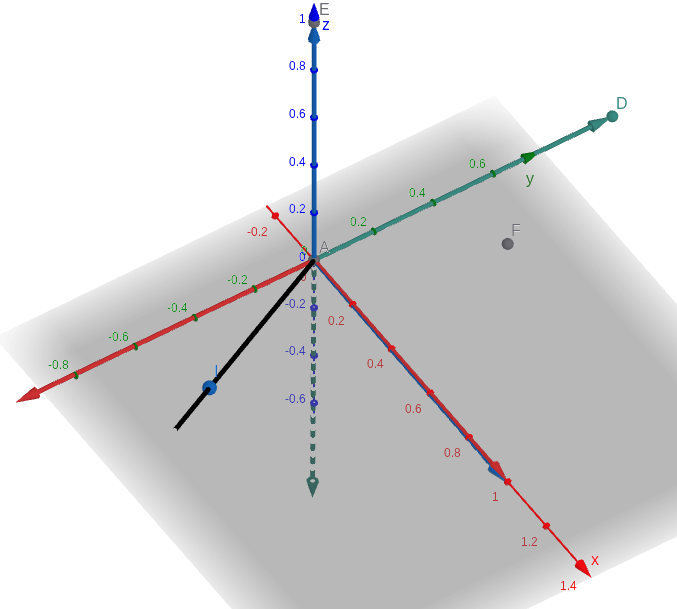

#### Phi_local (Hamilton) using log_so3
Phi_local (Hamilton) using log_so3 produces the below. The new basis vectors are as below. New x becomes old z, new y becomes -old x, new z becomes -old y.

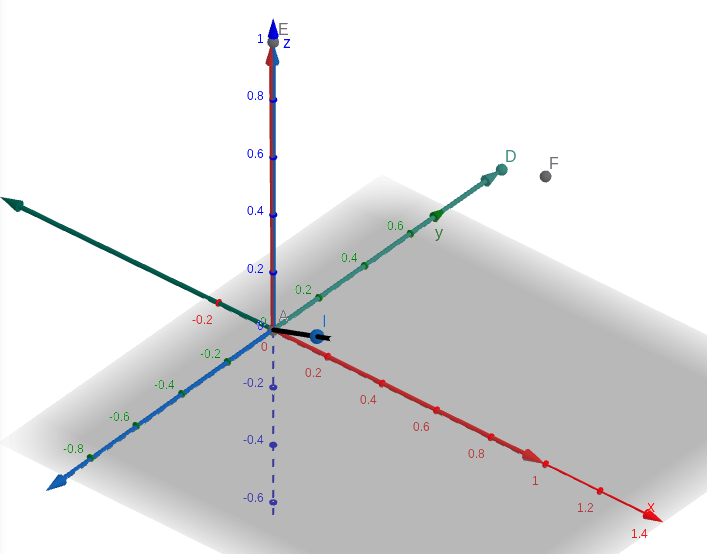

### Angle negation leads to transpose of rotation matrix

In [58]:
axis = np.array([0,0,1])
angle = np.pi/6

phi = angle * (axis / np.linalg.norm(axis))
R = rodrigues_hamilton(phi)

print(R)
print("A simple rotation matrix above from rodrigues formula exp(theta*[u]x)")
print("has theta and axis in initial frame and outputs a rotation matrix")
print("that can convert frame points from local to global frame.")
print()

negative_angle = -angle
phi_negative = negative_angle * (axis / np.linalg.norm(axis))
R_negative = rodrigues_hamilton(phi_negative)

print("If we negate the angle, now phi_negative would be in local frame, the rotation matrix should be the same")
print(R_negative)


[[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]
A simple rotation matrix above from rodrigues formula exp(theta*[u]x)
has theta and axis in initial frame and outputs a rotation matrix
that can convert frame points from local to global frame.

If we negate the angle, now phi_negative would be in local frame, the rotation matrix should be the same
[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]


### Rotation vector when multiplied by R or R transpose stays the same. So if there is a rotation vector in global frame and I multiply it with R_L_to_G or R_G_to_L I get the same vector back

It seems like with the current understanding of log_so3 phi_hamilton is negative of phi_jpl. There is something with log_so3 thats still to be understood.

If I take +theta around [x,y,z] to move from local to global then I should take -theta or negate [x,y,z] to come back from global to local. I dont understand which frame this negation should be in since rotation vector is same in both frames hence both should be valid

In [54]:

phi_hamilton = log_so3(R_x_90_z_90)
phi_jpl = log_so3(R_x_90_z_90_jpl)

print(phi_hamilton)
print(R_x_90_z_90.T@phi_hamilton)
print(R_x_90_z_90@phi_hamilton)
print(phi_jpl)

# It seems like the rotation vector does stay the same in terms of coordinates in 
# global and local frame

[ 1.20919958 -1.20919958  1.20919958]
[ 1.20919958 -1.20919958  1.20919958]
[ 1.20919958 -1.20919958  1.20919958]
[-1.20919958  1.20919958 -1.20919958]


## Thinking about rotations 
R_G_to_L -> R_JPL, R_L_to_G -> R_Ham. Now they are transpose of each other. A local frame is moving wrt global frame. R_JPL and R_Ham both can be used to represent the attitude. 

R_Ham tells me the basis vectors of L in G frame. L is moving hence I am tracking the L frames basis in global frame as they rotate. 

R_JPL does the opposite. It tracks basis vectors of the global in local frame. DCM has columns where each column is global basis in local frame coordinates. Hence R_JPL tracks how the global axis changes with respect to local frame as the local frame changes. 

Hence in R_Ham observer is sitting on global fixed frame, while in R_JPL observor sits on local frame.

If I sit on the global frame with the observer aligned with axis of rotation, I see theta angle around the axis. If I sit on same axis of rotation in local frame which would coincide with axis of rotation in global frame then I see -theta angle.

Hence if both theta and axis of rotation are in one frame let say global frame then one out of R_Ham and R_JPL has to be positive theta and other should be negative. This is because of exp(theta[k]x) which comes out of the derivative of the constraint R^TR = I is for active rotation. This means that forgetting the concept of frames basically exp(theta[k]x) is actively rotating the basis vector from initial time t=0 to the local time t=t (in both cases in R_JPL and R_Ham). Then:
R = exp(theta[k]x)
for positive theta we have one and for exp(-theta[k]x) we get the other one and track the basis accordingly.

In [56]:
# Do a rotation of 90 degrees around z-axis
axis = np.array([0,0,1])
angle = np.pi/6
phi = angle * (axis / np.linalg.norm(axis))

R_hamilton = rodrigues_hamilton(phi)
negative_angle = -angle
phi_negative = negative_angle * (axis / np.linalg.norm(axis))
R_negative = rodrigues_hamilton(phi_negative)
R_jpl = rotation_matrix_exponential(axis, angle)

print(R_hamilton)
print(R_negative)
print(R_jpl)

[[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]
[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]
[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]


Seems like active rotation is always exp(ktheta). JPL and hamilton are exp(ktheta) when theta is in local/final and global/initial frame respectively.